# •	Objective: 
# The primary goal of this project is to build a predictive model
# that can identify patients who are at high risk of hospital readmission within 30 days after their initial discharge.

# Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv(r"C:\Users\LENOVO\Downloads\hospital_readmissions.csv")
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Re=Addmi
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes,1
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No,0
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,0
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes,1
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes,1


In [3]:
df.shape

(1000, 14)

In [4]:
df.dtypes

Patient_ID                int64
Age                       int64
Gender                   object
Admission_Type           object
Diagnosis                object
Num_Lab_Procedures        int64
Num_Medications           int64
Num_Outpatient_Visits     int64
Num_Inpatient_Visits      int64
Num_Emergency_Visits      int64
Num_Diagnoses             int64
A1C_Result               object
Readmitted               object
Re=Addmi                  int64
dtype: object

In [5]:
df.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Re=Addmi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000,0.497000
std,288.819436,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203,0.500241
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,500.500000,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000,0.000000
75%,750.250000,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000,1.000000
max,1000.000000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
 13  Re=Addmi               1000 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 109.5+ KB


In [7]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
Re=Addmi                   0
dtype: int64

In [8]:
df_1=df.drop('A1C_Result',axis=1)

In [9]:
df_1.shape

(1000, 13)

In [10]:
df_1.dtypes

Patient_ID                int64
Age                       int64
Gender                   object
Admission_Type           object
Diagnosis                object
Num_Lab_Procedures        int64
Num_Medications           int64
Num_Outpatient_Visits     int64
Num_Inpatient_Visits      int64
Num_Emergency_Visits      int64
Num_Diagnoses             int64
Readmitted               object
Re=Addmi                  int64
dtype: object

In [11]:
df_1.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
Readmitted               0
Re=Addmi                 0
dtype: int64

In [13]:
df_1.Readmitted.value_counts()

Readmitted
No     503
Yes    497
Name: count, dtype: int64

In [14]:
df_1.value_counts()

Patient_ID  Age  Gender  Admission_Type  Diagnosis      Num_Lab_Procedures  Num_Medications  Num_Outpatient_Visits  Num_Inpatient_Visits  Num_Emergency_Visits  Num_Diagnoses  Readmitted  Re=Addmi
1           69   Other   Emergency       Heart Disease  33                  2                4                      1                     1                     5              Yes         1           1
672         32   Female  Elective        Infection      18                  8                4                      0                     3                     5              Yes         1           1
659         73   Female  Emergency       Diabetes       73                  7                4                      1                     0                     8              Yes         1           1
660         31   Female  Emergency       Infection      29                  26               4                      0                     4                     9              Yes         1           1


In [15]:
count_majority,count_minority = df_1.value_counts('Readmitted')

In [16]:
count_majority

503

In [17]:
count_minority

497

In [18]:
df_1_count_majarity=df_1[df_1['Readmitted']=='No']
df_1_count_minority=df_1[df_1['Readmitted']=='Yes']


In [19]:
df_1_count_majarity

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted,Re=Addmi
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,No,0
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,No,0
5,6,20,Male,Elective,Injury,11,20,3,4,1,3,No,0
8,9,19,Male,Urgent,Infection,70,23,1,2,4,6,No,0
9,10,47,Male,Emergency,Injury,41,24,4,0,0,3,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,39,Other,Urgent,Infection,25,14,2,1,0,9,No,0
995,996,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,No,0
996,997,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,No,0
997,998,75,Male,Urgent,Diabetes,29,13,3,1,4,8,No,0


In [20]:
df_1_count_minority

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted,Re=Addmi
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Yes,1
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Yes,1
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Yes,1
6,7,39,Female,Elective,Heart Disease,95,16,2,4,3,7,Yes,1
7,8,70,Female,Elective,Heart Disease,28,19,4,0,3,7,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,987,41,Male,Urgent,Heart Disease,58,28,0,3,3,5,Yes,1
988,989,76,Male,Emergency,Heart Disease,3,29,1,0,2,1,Yes,1
990,991,26,Other,Elective,Heart Disease,69,12,1,3,3,6,Yes,1
993,994,42,Female,Urgent,Heart Disease,83,16,0,1,4,5,Yes,1


# Visualization

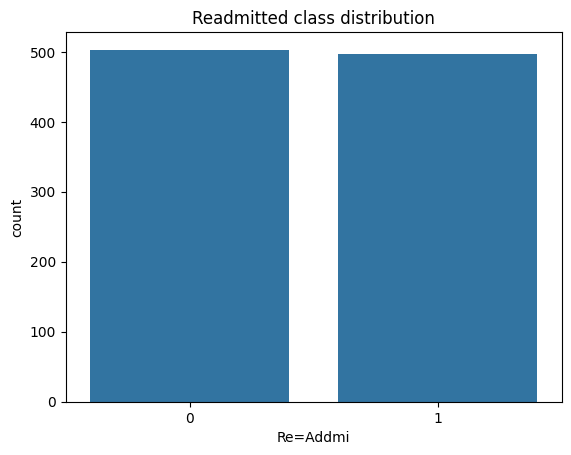

In [21]:
plt.title('Readmitted class distribution')
barchart = sns.countplot(x = 'Re=Addmi', data = df_1)
plt.show()


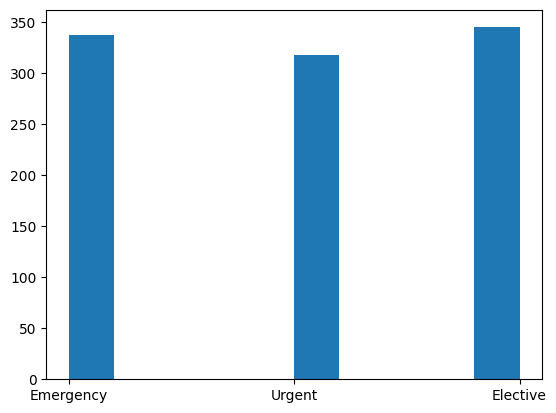

In [22]:
plt.hist(df_1['Admission_Type'],bins=10)
plt.show()

In [23]:
# K-Nearest Neighbours(K-NN)

In [24]:
# Importing the Data sets

In [25]:
x=df_1.iloc[:,[1,12]].values
y=df_1.iloc[:,-1].values

In [26]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [27]:
# Splotting the dataset into the training and test the set

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [29]:
x_train

array([[63,  0],
       [20,  1],
       [45,  1],
       ...,
       [78,  1],
       [72,  1],
       [35,  0]], dtype=int64)

In [30]:
# Training the K-NN model on the training set

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=classifier.predict(x_test)

In [33]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [34]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [35]:
# Making Confusion Matrix and Accuracy

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.968

In [37]:
from sklearn.metrics import recall_score
rs=recall_score(y_pred,y_test)
print(rs)

0.9727272727272728


In [38]:
from sklearn.metrics import precision_score
ps=precision_score(y_pred,y_test)
print(ps)

0.9553571428571429


In [39]:
from sklearn.metrics import f1_score
fs=f1_score(y_pred,y_test)
print(fs)

0.963963963963964


In [40]:
### Random Forest

In [41]:
x= df_1.iloc[:,[1,12]].values
y=df_1.iloc[:,-1].values

In [42]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10,n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [45]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [46]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
print(acc)

0.968


In [48]:
from sklearn.metrics import precision_score
ps=precision_score(y_pred,y_test)
print(ps)

0.9553571428571429


In [49]:
from sklearn.metrics import recall_score
rs=recall_score(y_pred,y_test)
print(rs)

0.9727272727272728
